# Chapter 4 - Training Models

# Linear Regression

Mean Squared Error:
$$
MSE(X, h_\theta) = \frac{1}{m} \times \sum_{i = 1}^{m}{(\theta^{T}x^{(i)} - y^{(i)})^2}
$$

## The Normal Equation

$$
\hat{\theta} = (X^{T}X)^{-1} \cdot X^T \cdot y
$$

In [4]:
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # Column Vector
y.shape

(100, 1)

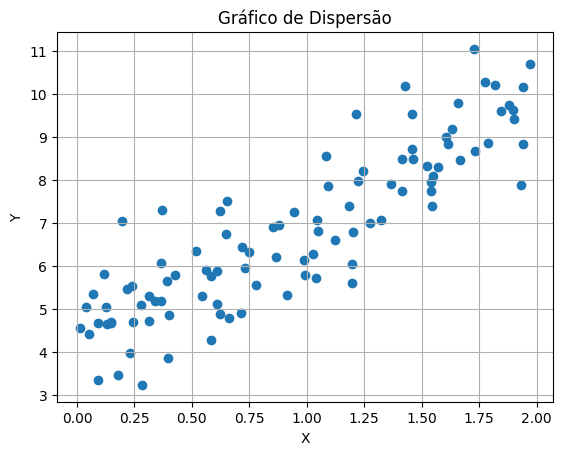

In [7]:
import matplotlib.pyplot as plt

x_flat = X.reshape(-1)
y_flat = y.reshape(-1)

plt.scatter(x_flat, y_flat)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfico de Dispersão")
plt.grid(True)
plt.show()

In [10]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

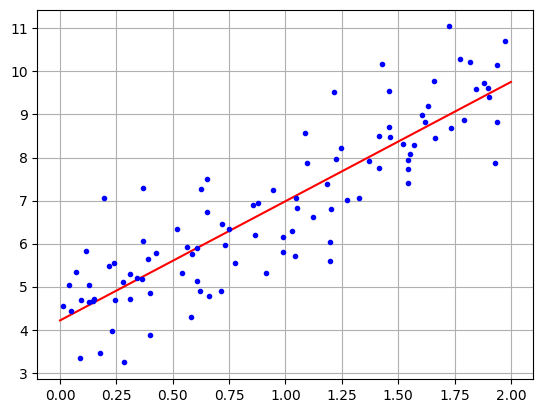

In [14]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.show()

# Gradient Descent

## Batch Gradient Descent

Partial derivatives of the cost function:

$$
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i = 1}^{m}{(\theta^Tx^{(i)}-y^{(i)})x_{j}^{(i)}}
$$

Gradient vector of the cost function

$$
\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^{T}(X\theta - y)
$$

Gradient descent step

$$
\theta^{s} = \theta - \eta\nabla_{\theta}MSE(\theta)
$$

In [17]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = (2 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

In [21]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-Batch Gradient Descent

# Polynomial Regression

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

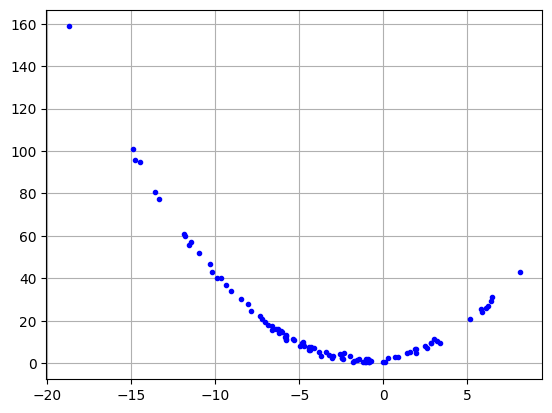

In [27]:
plt.plot(X, y, "b.", label="Predictions")
plt.grid(True)
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.01971508])

In [29]:
X_poly[0]

array([-0.01971508,  0.00038868])

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

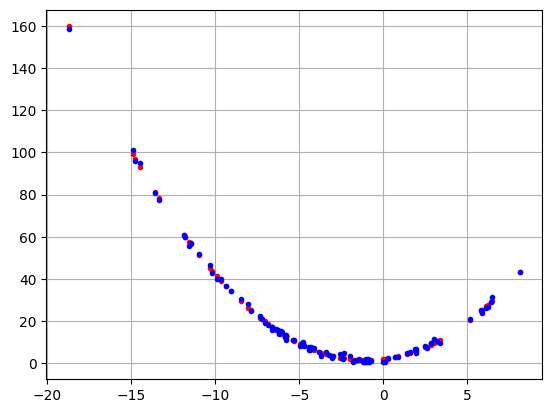

In [32]:
y_predict = lin_reg.predict(X_poly)

plt.plot(X, y_predict, "r.", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.show()